# Q1 What is Boosting in Machine Learning? Explain how it improves weak learners.



ANS1 Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to create a strong, highly accurate model. A weak learner is a model that performs only slightly better than random guessing.

#What is Boosting?

Boosting works by training models sequentially, where each new model focuses more on the mistakes made by the previous models. The final prediction is made by combining the outputs of all models, usually through weighted voting (classification) or weighted averaging (regression).

#Common boosting algorithms include:

.AdaBoost (Adaptive Boosting)

.Gradient Boosting

.XGBoost, LightGBM, CatBoost

#How Boosting Improves Weak Learners (Step-by-Step)

#1. Start with a Weak Learner

.A simple model (often a shallow decision tree called a decision stump) is trained on the dataset.

.Initially, all training samples have equal importance (weights).

#2. Focus on Errors

.After the first model is trained, the algorithm identifies misclassified samples.

.These incorrect samples are given higher importance (weights).

#3. Train the Next Weak Learner

.The next model is trained on the re-weighted dataset.

.It focuses more on difficult samples that earlier models failed to classify correctly.

#4. Repeat Sequentially

.This process continues for multiple iterations.

.Each new learner corrects the mistakes of the previous ones.

#5. Combine All Learners

.All trained models are combined into a single strong learner.

.More accurate learners are given higher weights in the final prediction.


#Why Boosting Works Well

Boosting improves weak learners by:

.✅ Reducing bias (models learn complex patterns)

.✅ Converting many weak models into one strong model

.✅ Paying extra attention to hard-to-predict cases

.✅ Improving overall accuracy significantly


#Simple Example

Imagine predicting loan defaults:

.First model misclassifies customers with irregular income.

.Boosting increases focus on those customers.

.Subsequent models learn patterns specific to that group.

.Final model becomes much more accurate than any single model.


#Key Characteristics of Boosting

| Feature     | Description                      |
| ----------- | -------------------------------- |
| Training    | Sequential                       |
| Focus       | Correcting previous errors       |
| Models      | Weak learners                    |
| Overfitting | Can occur if too many iterations |
| Performance | High accuracy                    |


# Q2  What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

ANS2 The key difference between AdaBoost and Gradient Boosting lies in how each new model is trained to correct previous errors.

#1. AdaBoost (Adaptive Boosting)
#Training Mechanism

.Models are trained sequentially.

.Each training sample is assigned a weight.

.After each model:

.Misclassified samples get higher weights

.Correctly classified samples get lower weights

.The next model focuses more on the hard-to-classify points.

# Error Handling

.Uses sample re-weighting.

.The importance of each model depends on its classification error rate.

#Key Idea

“Increase focus on data points that were previously misclassified.”

#Typical Base Learner

.Decision stumps (1-level decision trees)

#2. Gradient Boosting
#Training Mechanism

.Models are trained sequentially, but no sample re-weighting is used.

.Each new model is trained to predict the residual errors (differences between actual and predicted values).

.The process follows gradient descent optimization on a loss function.

#Error Handling

.Uses loss function gradients, not sample weights.

.Each model minimizes the loss of the ensemble so far.

#Key Idea

.“Fit the next model to the gradient of the loss function.”

#Typical Base Learner

.Shallow decision trees

#Key Differences in Training Process

| Aspect               | AdaBoost                                   | Gradient Boosting           |
| -------------------- | ------------------------------------------ | --------------------------- |
| Error correction     | Increases weights of misclassified samples | Fits residual errors        |
| Optimization method  | Sample re-weighting                        | Gradient descent            |
| Loss function        | Exponential loss                           | Any differentiable loss     |
| Sensitivity to noise | High                                       | Lower (with regularization) |
| Flexibility          | Limited                                    | Highly flexible             |


#Simple Intuition

#.AdaBoost keeps asking:
“Which points did I misclassify? Let me focus on them more.”

#.Gradient Boosting keeps asking:
“Where is my prediction wrong, and how can I reduce that error?”



# Q3  How does regularization help in XGBoost?

ANS3 Regularization in XGBoost is a key reason why it performs so well in practice. It helps control model complexity, prevents overfitting, and improves generalization on unseen data.

#What Regularization Means in XGBoost

Unlike traditional Gradient Boosting, XGBoost adds explicit regularization terms to its objective function.
The model does not only minimize training loss but also penalizes overly complex trees.

#Objective Function in XGBoost
Objective=Training Loss+Regularization Term





#Types of Regularization in XGBoost
#1. Tree Complexity Regularization (Structural Regularization)

.XGBoost penalizes:

.Number of leaves in a tree

.Magnitude of leaf weights

Ω(f)=γT+21​λ∑wj2​

Where:


T = number of leaves



wj= leaf weights


γ = penalty for adding a new leaf


λ = L2 regularization on leaf weights

#Effect:

.Prevents very deep or bushy trees

.Encourages simpler tree structures

#2. L1 & L2 Regularization on Leaf Weights

L1 (α) → encourages sparsity (removes unnecessary leaves)

L2 (λ) → keeps leaf weights small and stable

#Effect:

.Reduces variance

.Improves robustness to noisy data

#3. Shrinkage (Learning Rate)

.Scales down each tree’s contribution

.Forces the model to learn slowly and carefully

F(x)=F(x)+η⋅f(x)

#4. Subsampling Regularization

.Row subsampling (subsample)

.Column subsampling (colsample_bytree, colsample_bylevel)

#Effect:

.Reduces correlation between trees

.Acts like bagging inside boosting

#5. Early Stopping

.Stops training when validation performance stops improving

.Prevents unnecessary tree growth

#Why Regularization Is Important in XGBoost

Regularization helps XGBoost by:

.✅ Preventing overfitting on training data

.✅ Improving performance on unseen data

.✅ Making the model more stable

.✅ Handling noisy and high-dimensional datasets

#Simple Example (Intuition)

Without regularization:

    Model creates very deep trees to fit every detail → overfitting

With regularization:
     
    Model prefers simpler trees that generalize better → higher test accuracy

# Q4 Why is CatBoost considered efficient for handling categorical data?


ANS4 CatBoost is considered highly efficient for handling categorical data because it uses native, statistically sound techniques to encode categories while preventing target leakage and overfitting—without requiring heavy manual preprocessing.

#Key Reasons CatBoost Excels with Categorical Features
#1. Native Handling of Categorical Features (No One-Hot Needed)

.CatBoost accepts categorical columns directly.

.Avoids high-dimensional sparse vectors caused by one-hot encoding.

.Especially efficient for high-cardinality categories (e.g., user IDs, product codes).

✅ Faster training
✅ Lower memory usage

#2. Ordered Target Encoding (Prevents Target Leakage)

Instead of simple target encoding, CatBoost uses ordered (online) target statistics.

#How it works:

.Data is processed in a random permutation.

.For each row, category statistics are computed only using previous rows, not   future data.

#This avoids:

.Target leakage

.Over-optimistic training accuracy

#3. Powerful Categorical Feature Transformations

CatBoost automatically creates:

.Target statistics (mean, count, variance)

.Combinations of categorical features

.Categorical–numerical interactions

These are learned during training, not manually engineered.

#4. Symmetric (Oblivious) Decision Trees

.Each tree splits on the same feature at each depth.

.Results in:

.Faster prediction

.Reduced overfitting

.Better generalization on categorical patterns

#5. Robust Regularization for Categories

.Built-in smoothing for rare categories

.Bayesian averaging reduces noise from low-frequency values

#Comparison with Other Boosting Models


| Feature                         | XGBoost | LightGBM     | CatBoost  |
| ------------------------------- | ------- | ------------ | --------- |
| Native categorical support      | ❌       | ⚠️ (limited) | ✅         |
| Target leakage protection       | ❌       | ❌            | ✅         |
| Manual encoding needed          | Yes     | Often        | No        |
| Performance on categorical data | Medium  | Good         | Excellent |


# Q5 What are some real-world applications where boosting techniques are preferred over bagging methods?

ANS5 Boosting techniques are preferred over bagging methods in real-world problems where reducing bias and capturing complex patterns is more important than just reducing variance. Below are common applications where boosting consistently outperforms bagging.

#1. Credit Risk & Loan Default Prediction

#Why boosting?

.Captures non-linear relationships in customer behavior

.Focuses on hard-to-classify defaulters

.Works well with imbalanced datasets

Used by: Banks, NBFCs, fintech companies

Typical models: XGBoost, LightGBM, CatBoost

#2. Fraud Detection (Banking, Insurance, E-commerce)

#Why boosting?

.Fraud cases are rare and complex

.Boosting emphasizes misclassified (fraudulent) cases

.High precision and recall are crucial

#Examples:

.Credit card fraud

.Insurance claim fraud

.Online payment fraud

#3. Recommendation Systems

#Why boosting?

.Learns complex user–item interactions

.Handles sparse and categorical features effectively

.Improves ranking quality

#Used in:

.Product recommendations

.Content ranking

.Ad targeting


#4. Search Engines & Ad Ranking

#Why boosting?

.Optimizes ranking loss functions

.Captures subtle relevance signals

.Handles large-scale structured data

#Examples:

.Google search ranking

.Sponsored ad placement

#5. Medical Diagnosis & Healthcare Analytics

#Why boosting?

.Detects subtle patterns in clinical data

.Focuses on difficult or rare disease cases

.Provides higher predictive accuracy

#Applications:

.Disease risk prediction

.Medical imaging classification

.Patient outcome prediction

#6. Computer Vision (Structured Features)

#Why boosting?

.Excellent for feature-based vision tasks

.Combines many weak visual classifiers

#Examples:

.Face detection (Viola-Jones with AdaBoost)

.Object detection in surveillance

#7. Customer Churn Prediction

#Why boosting?

.Models complex customer behavior

.Identifies customers at risk of leaving

.Handles noisy and imbalanced data

Used by: Telecom, SaaS, streaming platforms

#When Boosting Is Preferred Over Bagging
| Scenario            | Boosting     | Bagging     |
| ------------------- | ------------ | ----------- |
| Dataset complexity  | High         | Low–medium  |
| Bias reduction      | Excellent    | Limited     |
| Focus on hard cases | Yes          | No          |
| Prediction accuracy | Very high    | Moderate    |
| Noise sensitivity   | Needs tuning | More robust |


# Q6  Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

(Include your Python code and output in the code box below.)


In [1]:
#ANS6

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the AdaBoost Classifier
ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train the model
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


# Q7 Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

(Include your Python code and output in the code box below.)

In [2]:
#ANS7

# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.7756446042829697


# Q8 Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

(Include your Python code and output in the code box below.)


In [3]:
#ANS8

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost Classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Parameter grid for tuning learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train using GridSearch
grid.fit(X_train, y_train)

# Get best model
best_model = grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Q9 Write a Python program to:
● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

(Include your Python code and output in the code box below.)

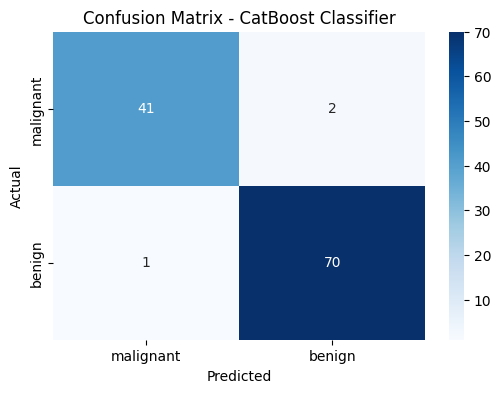

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
#ANS9

# Import required libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


# Q10 You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

(Include your Python code and output in the code box below.)


ANS10 Below is a complete, interview-ready + practical answer tailored to a FinTech loan-default prediction problem with imbalanced data, missing values, and mixed feature types, using boosting techniques.

#Step-by-Step Data Science Pipeline (Boosting for Loan Default)
#1️⃣ Data Preprocessing
🔹 Handling Missing Values

.Numeric features → median imputation (robust to outliers)

.Categorical features → special category like "Missing"

.CatBoost can handle missing values natively, reducing preprocessing effort

#🔹 Handling Categorical Features

.AdaBoost / XGBoost → require encoding (One-Hot / Target Encoding)

.CatBoost → handles categorical features internally using ordered statistics
✅ This avoids target leakage and improves performance

#🔹 Handling Class Imbalance

.Loan default is rare → imbalanced dataset

.Use:

.scale_pos_weight (XGBoost)

.class_weights (CatBoost)

.Proper evaluation metrics (ROC-AUC, Recall)


#2️⃣ Choice of Boosting Algorithm
# Why CatBoost (Best Choice Here)
| Algorithm    | Reason                                        |
| ------------ | --------------------------------------------- |
| AdaBoost     | Weak with noisy & complex financial data      |
| XGBoost      | Powerful but needs heavy preprocessing        |
| **CatBoost** | ✅ Handles missing & categorical data natively |


#3️⃣ Hyperparameter Tuning Strategy

.Use GridSearchCV / RandomizedSearchCV

.Tune:

.iterations

.learning_rate

.depth

.Use Stratified K-Fold Cross-Validation (preserves class ratio)

#4️⃣ Evaluation Metrics (Why Accuracy is NOT Enough)

| Metric                     | Why Important                      |
| -------------------------- | ---------------------------------- |
| **ROC-AUC**                | Measures ranking ability           |
| **Recall (Default class)** | Minimize missed defaulters         |
| **Precision**              | Avoid rejecting good customers     |
| **F1-Score**               | Balance between recall & precision |
| **Confusion Matrix**       | Business-level error analysis      |




ROC-AUC Score: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


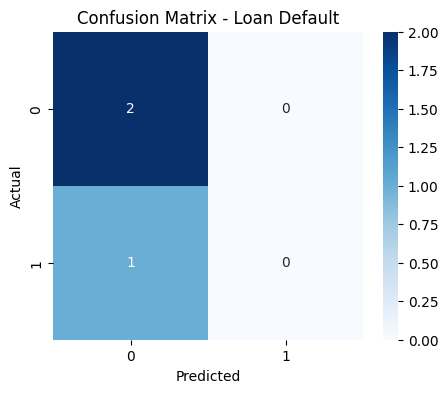

In [13]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# -----------------------------
# Create sample loan dataset
# -----------------------------
data = {
    'age': [25, 45, 35, np.nan, 50, 23, 40],
    'income': [30000, 80000, 50000, 60000, np.nan, 25000, 70000],
    'employment_type': ['Salaried', 'Self-Employed', 'Salaried',
                         'Salaried', 'Self-Employed', None, 'Salaried'],
    'loan_amount': [200000, 500000, 300000, 400000, 600000, 150000, 450000],
    'default': [0, 1, 0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Fix: Convert None in 'employment_type' to a string 'Missing' for CatBoost
df['employment_type'] = df['employment_type'].fillna('Missing')

# Separate features and target
X = df.drop('default', axis=1)
y = df['default']

# Identify categorical features
cat_features = ['employment_type']
cat_indices = [X.columns.get_loc(col) for col in cat_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# -----------------------------
# Train CatBoost Classifier
# -----------------------------
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    class_weights=[1, 3],  # handle imbalance
    verbose=False
)

model.fit(X_train, y_train, cat_features=cat_indices)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation
# -----------------------------
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Default")
plt.show()

In [1]:
print("hello world")


hello world
